<img src="https://drive.google.com/uc?id=1fqvUVxD8GcnwREynD5HQYndqP68SnIBd">

## Objective

**The challenge is to create a model that uses data from the first 24 hours of intensive care to predict patient survival. MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than 130,000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States.**

## Data Description 

MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than 130,000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States.

The data includes:

**Training data** for 91,713 encounters.  
**Unlabeled test data** for 39,308 encounters, which includes all the information in the training data except for the values for hospital_death.  
**WiDS Datathon 2020 Dictionary** with supplemental information about the data, including the category (e.g., identifier, demographic, vitals), unit of measure, data type (e.g., numeric, binary), description, and examples.  
**Sample submission files**

## TensorFlow 2.0

**TensorFlow is a general-purpose high-performance computing library open-sourced by Google in 2015. Since the beginning, its main focus was to provide high-performance APIs for building Neural Networks (NNs). However, with the advance of time and interest by the Machine Learning (ML) community, the lib has grown to a full ML ecosystem.**

**TensorFlow 2.0 represents a major milestone in the library’s development. Over the past few years, one of TensorFlow’s main weaknesses was its very complicated API.Defining deep neural networks required far more work than was reasonable. This led to the development of several high-level APIs that sat on-top of TensorFlow including TF Slim and Keras.Keras will be the official API of TensorFlow 2.0. Loading data, defining models, training, and evaluating are all now much easier to do, with cleaner Keras style code and faster development time.**

<img src = "https://drive.google.com/uc?id=1flZ84DlI8gQlkmFvC7Ql3Gkb1ACpEOkY" >

In [1]:
#Import TensorFlow into your program:
from __future__ import absolute_import, division, print_function, unicode_literals
# Install TensorFlow
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback, EarlyStopping



ModuleNotFoundError: No module named 'tensorflow'

## Import the relevant libraries

In [2]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


## Read the dataset

In [3]:
# loading dataset 
training_v2 = pd.read_csv("../input/widsdatathon2020/training_v2.csv")
test = pd.read_csv("../input/widsdatathon2020/unlabeled.csv")

In [4]:
# creating independent features X and dependant feature Y
y = training_v2['hospital_death']
X = training_v2
X = training_v2.drop('hospital_death',axis = 1)
test = test.drop('hospital_death',axis = 1)

In [5]:
# Remove Features with more than 75 percent missing values
train_missing = (X.isnull().sum() / len(X)).sort_values(ascending = False)
train_missing = train_missing.index[train_missing > 0.75]
X = X.drop(columns = train_missing)
test = test.drop(columns = train_missing)

In [6]:
categoricals_features = ['hospital_id','ethnicity','gender','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type','apache_3j_bodysystem','apache_2_bodysystem']
X = X.drop(columns = categoricals_features)
test = test.drop(columns = categoricals_features)

In [7]:
# Imputation transformer for completing missing values.
my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(X))
test_data = pd.DataFrame(my_imputer.fit_transform(test))
new_data.columns = X.columns
test_data.columns = test.columns
X= new_data
test = test_data

In [8]:
# Normalize the data attributes
normalized_X = preprocessing.normalize(X)

## Train/Test Split :  

The data is split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.The above is achieved in Scikit-Learn library using the train_test_split method.

In [9]:
x_train, x_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



## Callbacks :

Callback is a python class meant to be subclassed to provide specific functionality, with a set of methods called at various stages of training (including batch/epoch start and ends), testing, and predicting. Callbacks are useful to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to any of tf.keras.Model.fit(), tf.keras.Model.evaluate(), and tf.keras.Model.predict() methods. The methods of the callbacks will then be called at different stages of training/evaluating/inference.

In [10]:
checkpoint_callback = ModelCheckpoint("model.h5", monitor='accuracy', save_best_only=True, save_freq=2)

## Build the model  


Building the neural network requires configuring the layers of the model, then compiling the model.

## Set up the layers  

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

The network consists of a sequence of three tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second layer is a 64-nodes with relu activation and the third Dense layer with softmax activation returns an array of 2 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 2 classes

In [11]:
model = Sequential()
model.add(Dense(128, input_shape=(131,), activation='relu', name='fc1'))
model.add(Dense(64, activation='relu', name='fc2'))
model.add(Dense(2, activation='softmax', name='output'))
optimizer = SGD(lr=0.1)


## Compile the model :

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

**Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

**Optimizer** —This is how the model is updated based on the data it sees and its loss function.

**Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [12]:
model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Train the model :

Training the neural network model requires the following steps:

**Feed the training data to the model. In this example, the training data is in the x_train and y_train.  
The model learns to associate features and labels.  
You ask the model to make predictions about a test set—in this example, the x_test   
Verify that the predictions match the labels from the y_test .**

## Feed the model :  

To start training, call the model.fit method—so called because it "fits" the model to the training data:



In [13]:
model.fit(x_train, y_train, verbose=0, batch_size=10, epochs=20, callbacks=[checkpoint_callback])

## AUC - ROC Curve :

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. Higher the AUC, better the model is at distinguishing between patients with disease and no disease. The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis

<img src = "https://drive.google.com/uc?id=1QFpY4TjfXYfKrCiRl1BcePuFEXOQ8-pX">

In [14]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

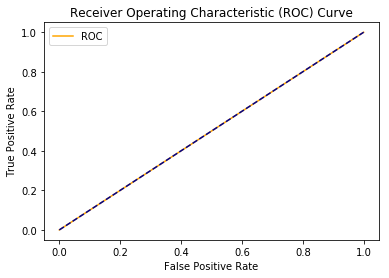

AUC-ROC : 0.5


In [15]:
probs = model.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)


## Submissions :

Submissions will be evaluated on the Area under the Receiver Operating Characteristic (ROC) curve between the predicted mortality and the observed target (hospital_death)

In [16]:
test1 = test.copy()
probstest = model.predict_proba(test)
probstest = probstest[:, 1]
test1["hospital_death"] = probstest
test1[["encounter_id","hospital_death"]].to_csv("submission5.csv",index=False)
test1[["encounter_id","hospital_death"]].head()

,encounter_id,hospital_death
0,2.0,0.0
1,5.0,0.0
2,7.0,0.0
3,8.0,0.0
4,10.0,0.0


Reference : 

Lee, M., Raffa, J., Ghassemi, M., Pollard, T., Kalanidhi, S., Badawi, O., Matthys, K., Celi, L. A. (2020). WiDS (Women in Data Science) Datathon 2020: ICU Mortality Prediction. PhysioNet. doi:10.13026/vc0e-th79

Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.

Official TensorFlow documentation
